## Indiana University Chest X-Rays Dataset
Download from https://www.kaggle.com/datasets/raddar/chest-xrays-indiana-university


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [41]:
! ls xrays | wc -l

7470


In [69]:
image_path = 'images/images_normalized'
images = os.listdir(image_path)

In [67]:
pj = pd.read_csv('indiana_projections.csv')
reports = pd.read_csv('indiana_reports.csv')

frontal_pj = pj.loc[pj['projection'] == 'Frontal']

In [68]:
frontal_img = []
captions = []

for index, row in reports.iterrows():
    uid = row['uid']
    pj_row = frontal_pj.loc[frontal_pj['uid'] == uid]
    caption = row['findings']
    
    if not pj_row.empty:
        image = pj_row['filename'].values[0]
        frontal_img.append(image)
        captions.append(caption)

In [6]:
# metadata = pd.DataFrame({'file_name': frontal_img, 'text': captions})
# metadata = metadata.dropna()
# metadata.to_csv('metadata.csv')

In [5]:
# count = 0
# total = len(frontal_img)

# for image in images:
#     if image in frontal_img:
#         path = os.path.join(image_path, image)
#         img = cv2.imread(path)
#         resized = cv2.resize(img, (512, 512))
#         cv2.imwrite(f'xrays_frontal/{image}', resized)
#         print(f'Resized {count}/{total} images.')
#         count += 1

In [47]:
resize_path = 'xrays_frontal/data/'

def visualize_resized(img_arr, idx):
    img = cv2.imread(os.path.join(resize_path, img_arr[idx]))
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(rgb_img.shape)
    imgplot = plt.imshow(rgb_img)
    plt.show()

(512, 512)


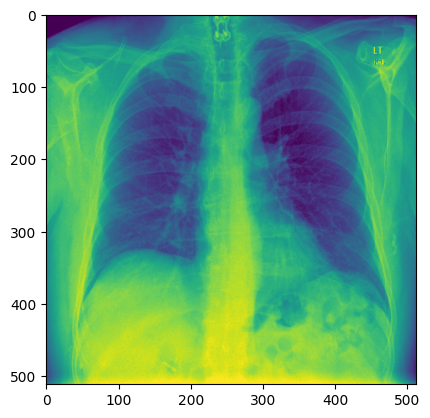

In [48]:
visualize_resized(frontal_img, 57)

In [90]:
import splitfolders
splitfolders.ratio('xrays_frontal', output="xray_dataset", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 3689 files [07:04,  8.69 files/s]


In [100]:
train_path = 'xray_dataset/train'
test_path = 'xray_dataset/test'
val_path = 'xray_dataset/val'

In [97]:
import shutil

def move_files(src, dest):    
    file_names = os.listdir(src)
    
    for file_name in file_names:
        shutil.move(os.path.join(src, file_name), dest)

In [99]:
move_files('xray_dataset/train/data/', 'xray_dataset/train/')
move_files('xray_dataset/test/data/', 'xray_dataset/test/')
move_files('xray_dataset/val/data/', 'xray_dataset/val/')

In [109]:
train_images = [f for f in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, f))]
test_images = [f for f in os.listdir(test_path) if os.path.isfile(os.path.join(test_path, f))]
val_images = [f for f in os.listdir(val_path) if os.path.isfile(os.path.join(val_path, f))]

In [111]:
train_captions = []
train_list = []

for image in train_images:

    path = os.path.join(train_path, image)

    row = frontal_pj.loc[frontal_pj['filename'] == image]
    uid = row['uid'].values[0]
    
    report_row = reports.loc[reports['uid'] == uid]
    caption = report_row['findings'].values[0]
    
    if caption == caption:
        train_captions.append(caption)
        train_list.append(image)

In [112]:
test_captions = []
test_list = []

for image in test_images:

    path = os.path.join(test_path, image)
    
    row = frontal_pj.loc[frontal_pj['filename'] == image]
    uid = row['uid'].values[0]
    
    report_row = reports.loc[reports['uid'] == uid]
    caption = report_row['findings'].values[0]
    
    if caption == caption:
        test_captions.append(caption)
        test_list.append(image)

In [113]:
val_captions = []
val_list = []

for image in val_images:

    path = os.path.join(val_path, image)
    
    row = frontal_pj.loc[frontal_pj['filename'] == image]
    uid = row['uid'].values[0]
    
    report_row = reports.loc[reports['uid'] == uid]
    caption = report_row['findings'].values[0]
    
    if caption == caption:
        # print(caption)
        val_captions.append(caption)
        val_list.append(image)

In [117]:
for filename in os.listdir(train_path):
    if filename not in train_list:
        path = os.path.join(train_path, filename)
        if os.path.isfile(path):
            os.remove(path)
        else:
            shutil.rmtree(path)

In [118]:
for filename in os.listdir(test_path):
    if filename not in test_list:
        path = os.path.join(test_path, filename)
        if os.path.isfile(path):
            os.remove(path)
        else:
            shutil.rmtree(path)

In [119]:
for filename in os.listdir(val_path):
    if filename not in val_list:
        path = os.path.join(val_path, filename)
        if os.path.isfile(path):
            os.remove(path)
        else:
            shutil.rmtree(path)

In [120]:
train_df = pd.DataFrame({'file_name': train_list, 'text': train_captions})
test_df = pd.DataFrame({'file_name': test_list, 'text': test_captions})
val_df = pd.DataFrame({'file_name': val_list, 'text': val_captions})

train_df.to_csv('xray_dataset/train/metadata.csv', index=False)
test_df.to_csv('xray_dataset/test/metadata.csv', index=False)
val_df.to_csv('xray_dataset/val/metadata.csv', index=False)

In [121]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="xray_dataset", split="train")

Resolving data files:   0%|          | 0/2563 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/327 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/312 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /home/alif/.cache/huggingface/datasets/imagefolder/default-ef2ee21ef87a7825/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


In [124]:
dataset[99]["text"]

'2 images. Calcified granuloma, right lung base. Heart size and pulmonary vascular engorgement appear within limits of normal. Mediastinal contour is unremarkable. No focal consolidation, pleural effusion, or pneumothorax identified. No convincing acute bony findings.'